In [16]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

#computes the euler approximation of a differential equation in the form dy/dx=f(x,y) with the
#initial condition y(x_0)=y_0, running from x_0 to x= end(inclusive) with a step size of h, printing the 
#intermediate values
def euler(fn, x_0, y_0, h, end):
    y = y_0
    r = int(-1*math.log10(h))
    txt = "x: {} y:{}"
    for x in np.arange(x_0,end + h, h):
        print(txt.format(round(x,r),y))
        y = y + h*fn(x,y)
#same as euler(), but instead of printing the intermediate values returns the final y value
def ffeuler(fn, x_0, y_0, h, end):
    y = y_0
    r = int(-1*math.log10(h))
    txt = "x: {} y:{}"
    for x in np.arange(x_0,end, h):
        y = y + h*fn(x,y)    
    return y

#when given a plot object 'ax', graphs the euler approximation for the given values with legend label lbl
def plot_euler(fn, x_0, y_0, h, end, ax, lbl):
    y = y_0
    r = int(-1*math.log10(h))
    txt = "x: {} y:{}"
    lst = []
    for x in np.arange(x_0,end + h, h):
        lst.append((x,y))
        y = y + h*fn(x,y)
    ax.plot([i for i,j in lst],[j for i,j in lst],label=lbl)

#plots the slope field of a function 'fn(x,y)' over the range of values on the plot 'ax' with h and d being scaling constants
def slope_field(fn, x1, x2, y1, y2, h, d, ax):
    def seg_from_point_slope(p,m,h):
        x, y = p[0], p[1]
        a = (h/2)*math.cos(math.atan(m))
        b = (h/2)*math.sin(math.atan(m))
        return[(x-a,y-b),(x+a,y+b)]
        
    def plot_segments(segments, g):
        for seg in segments:
            g.plot([seg[0][0],seg[1][0]],[seg[0][1],seg[1][1]],'black')
            
    xp = np.arange(x1,x2+d,d)
    yp = np.linspace(y1,y2,len(xp))
    points = [[i,j] for i in xp
                    for j in yp]
    segments = [seg_from_point_slope(p,fn(p[0],p[1]),h) for p in points]
    plot_segments(segments,ax)
    

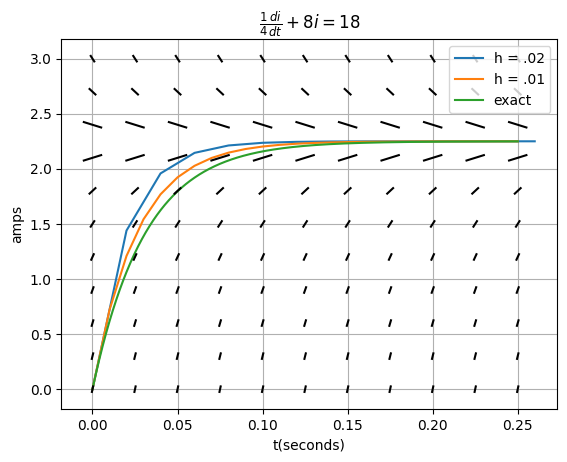

In [17]:
fig, ax = plt.subplots()
ax.set(xlabel='t(seconds)',ylabel='amps',title=r'$\frac{1}{4}\frac{di}{dt}+8i=18$')
ax.grid()

fn = lambda t, i : 72-32*i
ex = lambda t, i :9/4-(9/4)*math.e**(-32*t)
t = np.linspace(0,0.25,1000)

plot_euler(fn, 0, 0, .02, 0.25, ax, "h = .02")
plot_euler(fn, 0, 0, .01, 0.25, ax, "h = .01")
ax.plot(t,ex(t,0),label="exact")
slope_field(fn, 0, 0.25, 0, 3, .05, .025, ax)
ax.legend()
fig.savefig("plot.png")




In [18]:
euler(fn, 0, 0, .02, 0.25)

x: 0.0 y:0
x: 0.0 y:1.44
x: 0.0 y:1.9584000000000001
x: 0.1 y:2.1450240000000003
x: 0.1 y:2.21220864
x: 0.1 y:2.2363951104
x: 0.1 y:2.245102239744
x: 0.1 y:2.24823680630784
x: 0.2 y:2.2493652502708223
x: 0.2 y:2.249771490097496
x: 0.2 y:2.2499177364350986
x: 0.2 y:2.2499703851166357
x: 0.2 y:2.249989338641989
x: 0.3 y:2.249996161911116


In [19]:
euler(fn, 0, 0, .01, 0.25)

x: 0.0 y:0
x: 0.01 y:0.72
x: 0.02 y:1.2096
x: 0.03 y:1.542528
x: 0.04 y:1.7689190399999999
x: 0.05 y:1.9228649472
x: 0.06 y:2.027548164096
x: 0.07 y:2.09873275158528
x: 0.08 y:2.1471382710779903
x: 0.09 y:2.1800540243330335
x: 0.1 y:2.202436736546463
x: 0.11 y:2.217656980851595
x: 0.12 y:2.2280067469790845
x: 0.13 y:2.2350445879457776
x: 0.14 y:2.239830319803129
x: 0.15 y:2.2430846174661276
x: 0.16 y:2.245297539876967
x: 0.17 y:2.2468023271163378
x: 0.18 y:2.2478255824391096
x: 0.19 y:2.2485213960585946
x: 0.2 y:2.2489945493198444
x: 0.21 y:2.249316293537494
x: 0.22 y:2.2495350796054963
x: 0.23 y:2.2496838541317374
x: 0.24 y:2.2497850208095813
x: 0.25 y:2.2498538141505153


In [20]:
ex(0.15,0)

2.231483069139705

In [22]:
ffeuler(fn,0,0,0.02,0.15)

2.2493652502708223

In [24]:
ffeuler(fn,0,0,0.01,0.15)

2.2430846174661276